In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from numpy.linalg import norm
from datetime import date

import asyncio
import math
import os
import sys
import time
sys.path.append("C:\\Users\\Sam Yu\\Documents\\GitHub\\LiquidCrystals")

from LiquidCrystalSystem import LCSystem

In [2]:
def get_config(r):
    
    if r == 0:
        particle_no_index = 3
        confinement = "Circle"
    else:
        particle_no_index = 4
        confinement = "Annulus"
    
    config = {"R": 25,
              "r": r,
              "b": 5,
              "a": 0.25,
              "confinement": confinement,
              "datasets_path": f"C:\\Users\\Sam Yu\\Desktop\\School\\4A\\Phys_437A_Research_Project\\datasets\\r={r}\\sam",
              "particle_no_index": particle_no_index}
    
    return config

In [3]:
run_config = get_config(r=0)

print(f"{run_config}\n")

globals().update(run_config)
    
# particle numbers
Ns = sorted([int(_path_.split("_")[particle_no_index]) for _path_ in os.listdir(datasets_path)])

print(f"Particle numbers: {Ns}")

{'R': 25, 'r': 0, 'b': 5, 'a': 0.25, 'confinement': 'Circle', 'datasets_path': 'C:\\Users\\Sam Yu\\Desktop\\School\\4A\\Phys_437A_Research_Project\\datasets\\r=0\\sam', 'particle_no_index': 3}

Particle numbers: [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175]


particle number: 20 -> density: 0.0400
particle number: 25 -> density: 0.0500
particle number: 30 -> density: 0.0600
particle number: 35 -> density: 0.0700
particle number: 40 -> density: 0.0800
particle number: 45 -> density: 0.0900
particle number: 50 -> density: 0.1000
particle number: 55 -> density: 0.1100
particle number: 60 -> density: 0.1200
particle number: 65 -> density: 0.1300
particle number: 70 -> density: 0.1400
particle number: 75 -> density: 0.1500
particle number: 80 -> density: 0.1600
particle number: 85 -> density: 0.1700
particle number: 90 -> density: 0.1800
particle number: 95 -> density: 0.1900
particle number: 100 -> density: 0.2000
particle number: 105 -> density: 0.2100
particle number: 110 -> density: 0.2200
particle number: 115 -> density: 0.2300
particle number: 120 -> density: 0.2400
particle number: 125 -> density: 0.2500
particle number: 130 -> density: 0.2600
particle number: 135 -> density: 0.2700
particle number: 140 -> density: 0.2800
particle number:

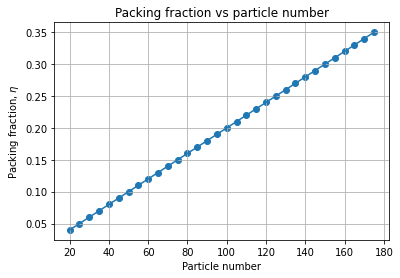

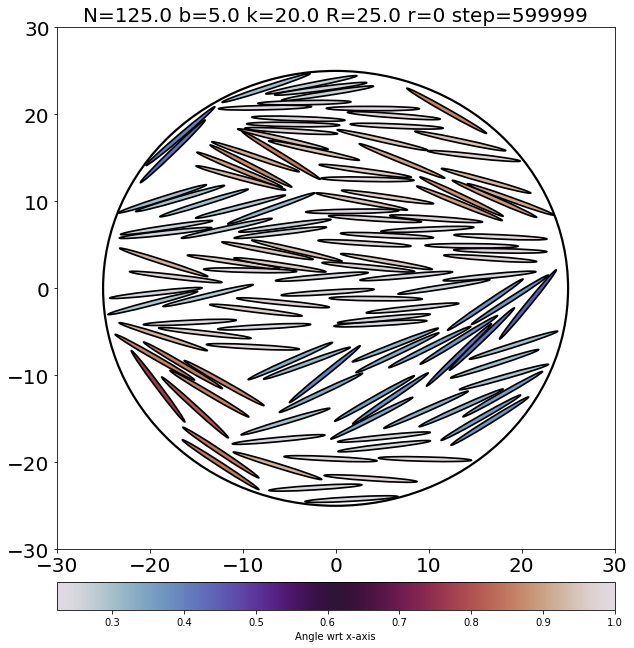

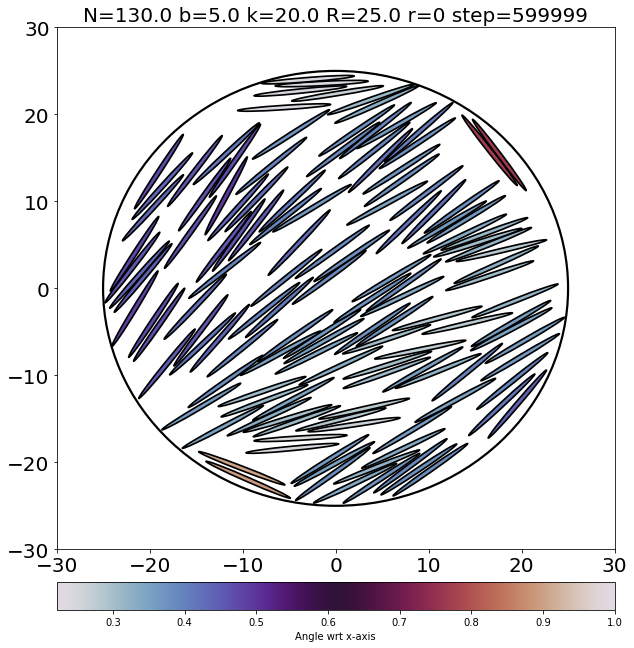

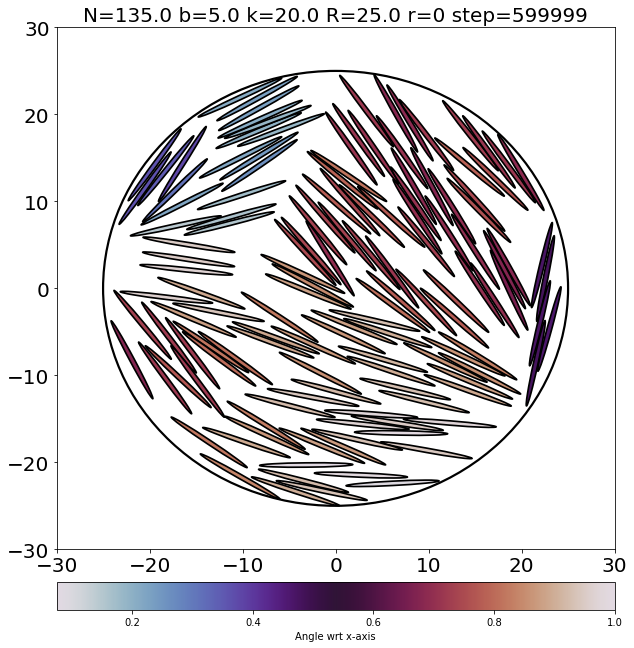

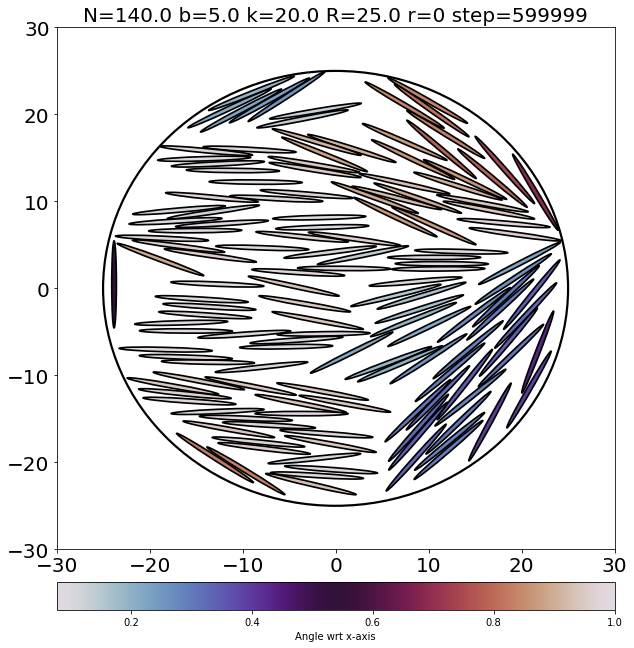

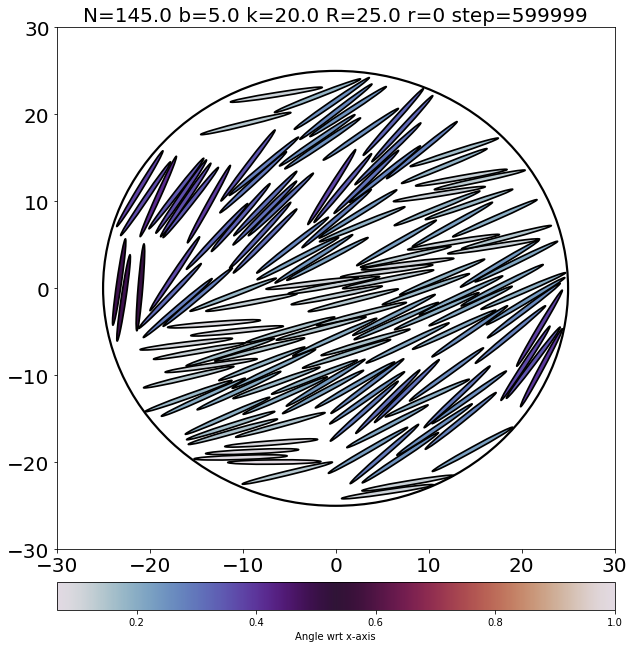

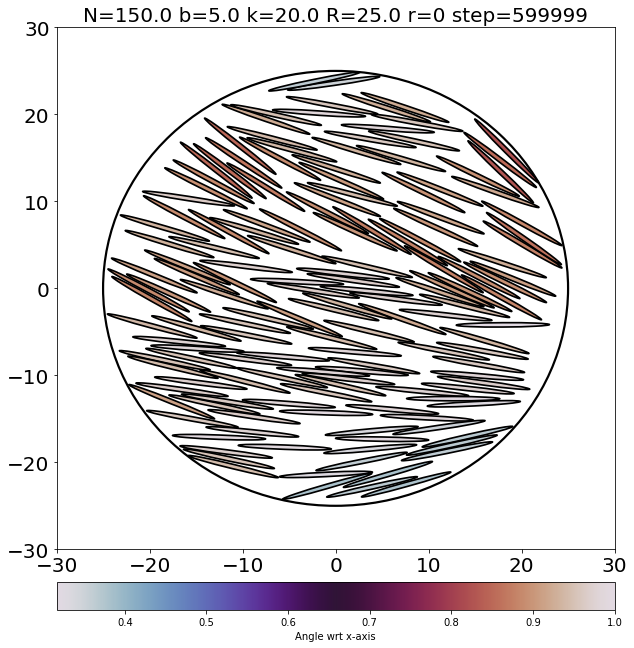

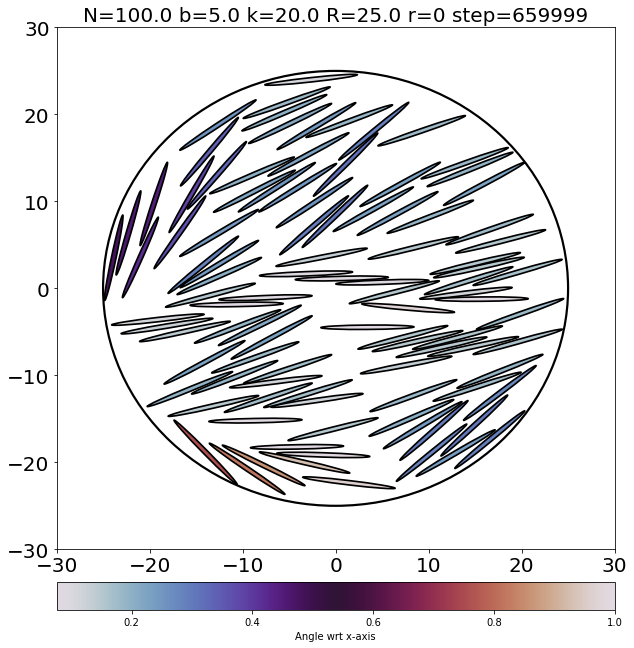

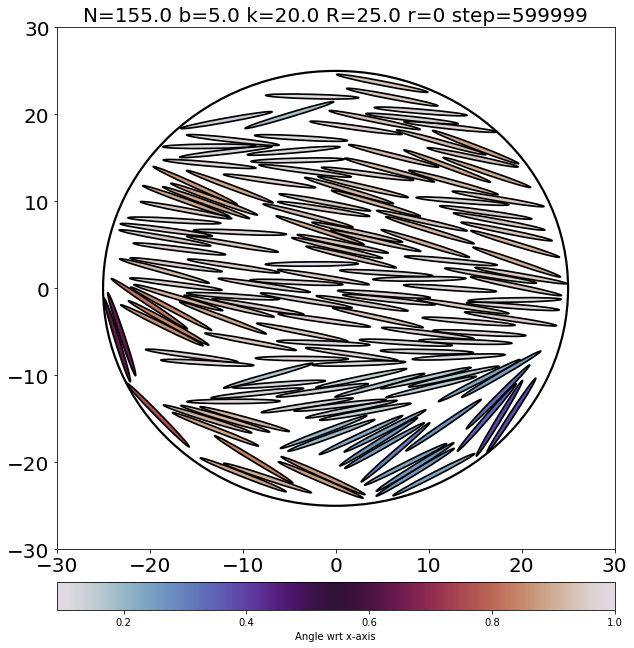

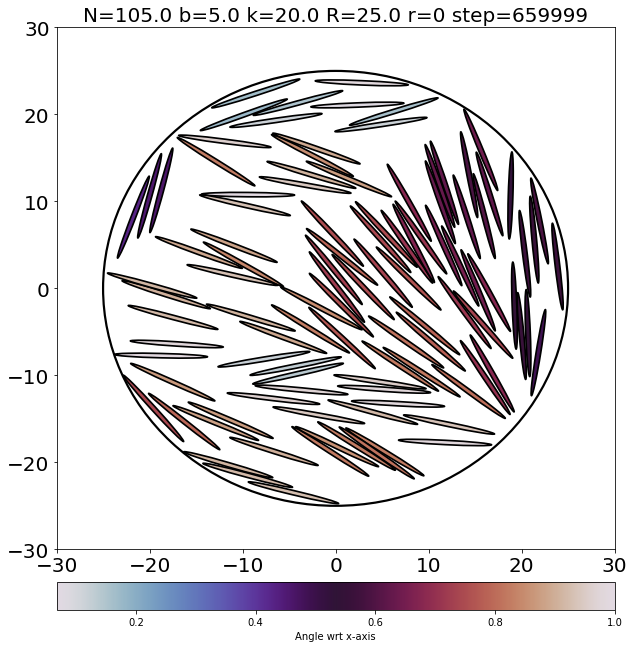

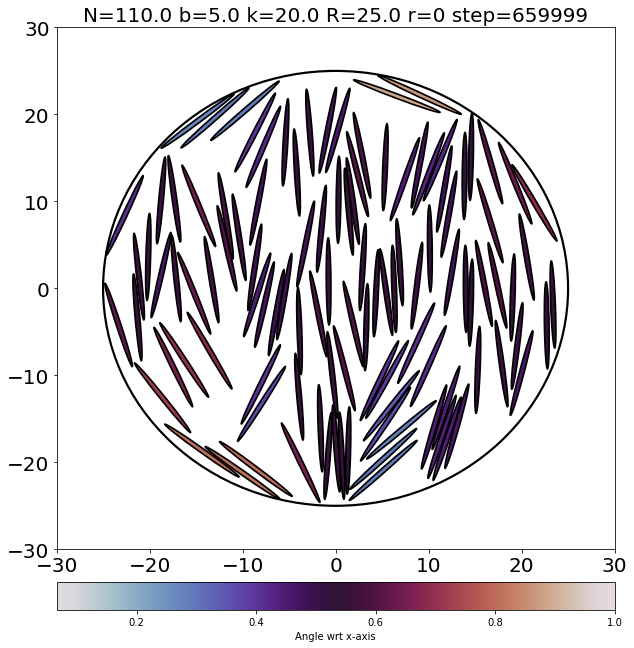

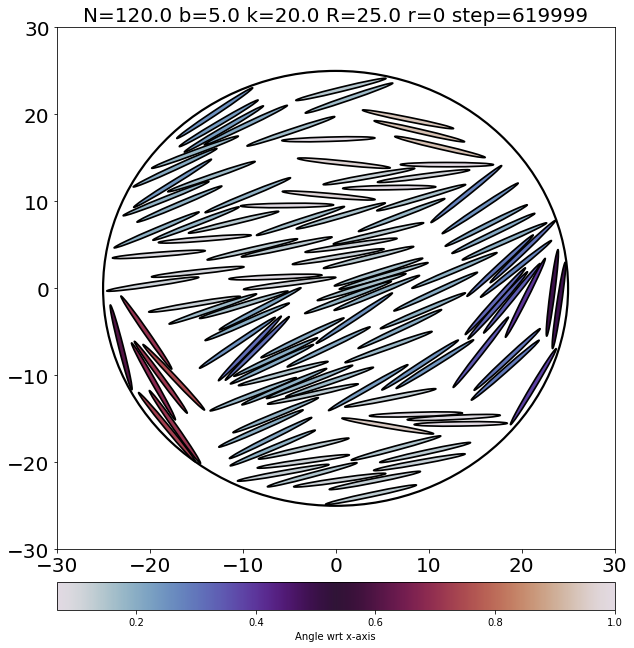

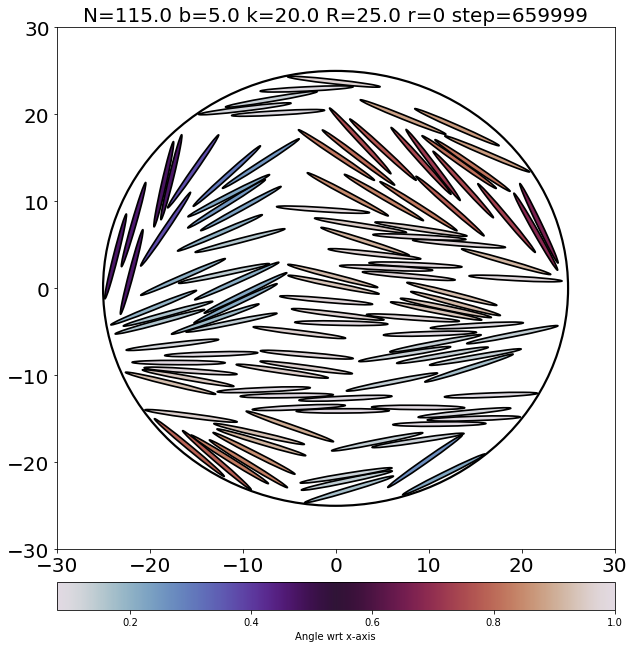

In [16]:
# Create the results directory for specified inner radius
base_results_path = f"C:\\Users\\Sam Yu\\Desktop\\School\\4A\\Phys_437A_Research_Project\\results\\{date.today()}\\"
results_path = os.path.join(base_results_path, f"r={r}")

if not os.path.exists(results_path):
    os.makedirs(results_path, exist_ok=True)
    
# Path for run at (number of features, number of samples)
num_of_features = 10
num_of_samples = 3

run_path = os.path.join(results_path, f"features_{num_of_features}_samples_{num_of_samples}")

if not os.path.exists(run_path):
    os.mkdir(run_path)
    

#### Plot the packing fractions with respect to particle number ####

# convert to densities
densities = [(N*a*b/(R**2-r**2)) for N in Ns]

for i, N in enumerate(Ns):
    print(f"particle number: {Ns[i]} -> density: {densities[i]:.4f}")

# Plot the packing fractions w.r.t particle number
with plt.ioff():
    fig, ax = plt.subplots()
    
ax.plot(Ns, densities)
ax.scatter(Ns, densities)
ax.set_xlabel("Particle number")
ax.set_ylabel(r"Packing fraction, $\eta$")
ax.set_title("Packing fraction vs particle number")
ax.grid()

fig.savefig(os.path.join(results_path, "packing_fraction_particles_no.png"))

plt.show()

plt.close(fig)

##### End plotting #####

In [5]:
systems = dict()

for _path_ in os.listdir(datasets_path):
    
    full_path = os.path.join(datasets_path, _path_, 'instanceRun')
    
    # Simulation summary notes exists
    if os.path.exists(os.path.join(full_path, f"MonteCarlo_{confinement}_SimNotes.txt")):
        
        lc = LCSystem(lc_data_path=full_path, confinement=confinement)
        num_of_particles = lc.sim_params['# of Ellipse']
        systems[num_of_particles] = lc
    
    # Simulation summary notes DNE
    else:
        
        lc = LCSystem(lc_data_path=full_path, confinement=confinement)
        lc.sim_params["R"] = R
        lc.sim_params["r"] = r
        lc.sim_params["Semi Major Axis"] = b
        lc.sim_params["Semi Minor Axis"] = a
        
        num_of_particles = lc.sim_params["# of Ellipse"]
        
        systems[num_of_particles] = lc

# remove outliers
#systems = {N:systems[N] for N in systems.keys() if N > 65 and N < 210}

for N in sorted(list(systems.keys())):
    print(f"Particle number: {N}, max step: {max(systems[N].snapshots.keys())}")

Particle number: 20.0, max step: 2000000.0
Particle number: 25.0, max step: 2000000.0
Particle number: 30.0, max step: 2000000.0
Particle number: 35.0, max step: 2000000.0
Particle number: 40.0, max step: 2000000.0
Particle number: 45.0, max step: 2000000.0
Particle number: 50.0, max step: 2000000.0
Particle number: 55.0, max step: 2000000.0
Particle number: 60.0, max step: 2000000.0
Particle number: 65.0, max step: 2000000.0
Particle number: 70.0, max step: 2000000.0
Particle number: 75.0, max step: 2000000.0
Particle number: 80.0, max step: 2000000.0
Particle number: 85.0, max step: 2000000.0
Particle number: 90.0, max step: 2000000.0
Particle number: 95.0, max step: 2000000.0
Particle number: 100.0, max step: 2000000.0
Particle number: 105.0, max step: 2000000.0
Particle number: 110.0, max step: 2000000.0
Particle number: 115.0, max step: 2000000.0
Particle number: 120.0, max step: 2000000.0
Particle number: 125.0, max step: 2000000.0
Particle number: 130.0, max step: 2000000.0
Part

Conventional order parameter definition: $P^2_{max} = [<\frac{1}{N}\sum_{i=1}^{N}\cos(2\theta_i)>^2 + <\frac{1}{N}\sum_{i=1}^{N}\sin(2\theta_i)>^2]^{1/2}$

Particle number: 20.0, Density: 0.04, Order param: 0.029437293431785496
Particle number: 25.0, Density: 0.05, Order param: 0.03933251142522923
Particle number: 30.0, Density: 0.06, Order param: 0.020215955904496853
Particle number: 35.0, Density: 0.07, Order param: 0.03596460686040746
Particle number: 40.0, Density: 0.08, Order param: 0.04963494202215568
Particle number: 45.0, Density: 0.09, Order param: 0.022980586375669614
Particle number: 50.0, Density: 0.1, Order param: 0.06495057753059455
Particle number: 55.0, Density: 0.11, Order param: 0.016825939501820885
Particle number: 60.0, Density: 0.12, Order param: 0.02935892736753927
Particle number: 65.0, Density: 0.13, Order param: 0.031339300246374574
Particle number: 70.0, Density: 0.14, Order param: 0.03986316184690927
Particle number: 75.0, Density: 0.15, Order param: 0.06914907249739577
Particle number: 80.0, Density: 0.16, Order param: 0.12206439879315507
Particle number: 85.0, Density: 0.17, Order param: 0.07587929236942845
Pa

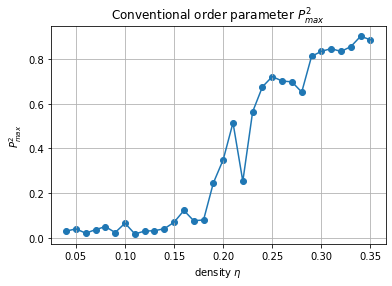

In [6]:
# Analysis using conventional order parameter

max_particle_num = max(systems.keys())
max_step = max(systems[max_particle_num].snapshots.keys())
min_step = min([step for step in systems[max_particle_num].snapshots.keys() if step > 0])

P2max = dict()

for particle_number in systems.keys():
    
    cosines = []
    sines = []
    system_state_at_mc_step = systems[particle_number].snapshots
        
    for mc_step in system_state_at_mc_step.keys():
        
        # wait for system to equilibrate
        if mc_step >= 0:
            
            snapshot = system_state_at_mc_step[mc_step]

            mean_theta = np.mean([coord[-1] for coord in snapshot])

            # subtract out the mean angle
            thetas = np.array([coord[-1] for coord in snapshot]) - mean_theta

            cosine = np.mean([np.cos(2*theta) for theta in thetas])
            sine = np.mean([np.sin(2*theta) for theta in thetas])

            cosines.append(cosine)
            sines.append(sine)

    avg_cosine = np.mean(cosines)
    avg_sine = np.mean(sines)
    
    P2max[particle_number] = np.sqrt(avg_cosine**2 + avg_sine**2)
    
with plt.ioff():
    fig, ax = plt.subplots()

for key in sorted(list(P2max.keys())):
    print(f"Particle number: {key}, Density: {key*a*b/(R**2-r**2)}, Order param: {P2max[key]}")

densities = sorted([N*a*b/(R**2-r**2) for N in P2max.keys()])
order_params = [P2max[N] for N in sorted(list(P2max.keys()))]

ax.plot(densities, order_params)
ax.scatter(densities, order_params)
ax.grid()
ax.set_xlabel(r"density $\eta$")
ax.set_ylabel(r"$P^2_{max}$")
ax.set_title(r"Conventional order parameter $P^2_{max}$")

fig.savefig(os.path.join(results_path, "p2max.png"))

plt.show()

plt.close()

C:\Users\Sam Yu\Documents\GitHub\LiquidCrystals\LiquidCrystalSystem.py:96: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = fig.colorbar(e, label="Angle wrt x-axis", orientation="horizontal", pad=0.05)


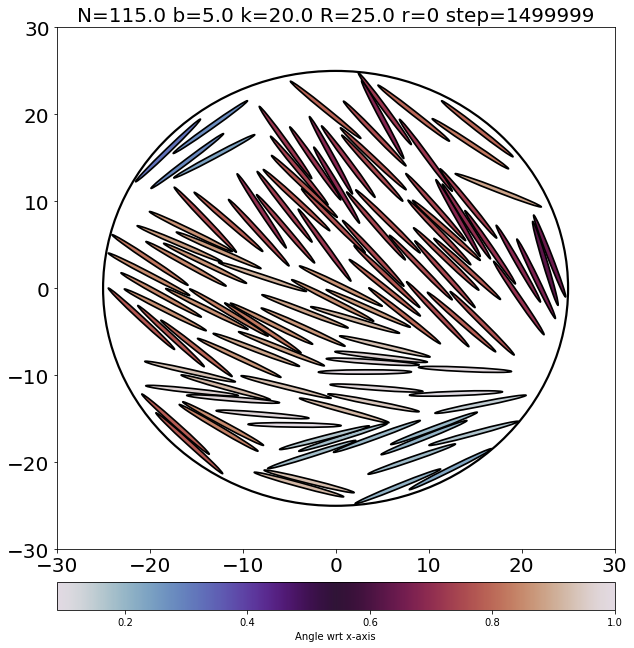

Step: 1019999, Cosine: 0.4939172091688704, Sine: -0.36158024305013065
Step: 1039999, Cosine: 0.371694296879892, Sine: -0.44104119378228573
Step: 1059999, Cosine: 0.48786662631195576, Sine: -0.4328598040554411
Step: 1079999, Cosine: 0.44537395209435215, Sine: -0.46424994027825006
Step: 1099999, Cosine: 0.36724395218115335, Sine: -0.49649900639650435
Step: 1119999, Cosine: 0.3210279531542569, Sine: -0.43276747079766714
Step: 1139999, Cosine: 0.3569044881956696, Sine: -0.4658395974235895
Step: 1159999, Cosine: 0.3097151261289495, Sine: -0.4872221984142248
Step: 1179999, Cosine: 0.33356459360009977, Sine: -0.48546785248481783
Step: 1199999, Cosine: 0.35306805886825854, Sine: -0.5407878663452641
Step: 1219999, Cosine: 0.32818250952968503, Sine: -0.48545647237798817
Step: 1239999, Cosine: 0.44096107995947387, Sine: -0.5256261918418653
Step: 1259999, Cosine: 0.36723229789718875, Sine: -0.5355312619972231
Step: 1279999, Cosine: 0.3336786729954449, Sine: -0.5262809191231728
Step: 1299999, Cosin

In [7]:
system = systems[115]

fig = system.plot_snapshot(1499999, color_angles=True)

plt.show(fig)

plt.close()

cosines = []
sines = []

for step in sorted(list(system.snapshots.keys())):
    
    if step >= 1000000:
        
        snapshot = system.snapshots[step]
        
        # mean angle
        mean_theta = np.mean([coord[-1] for coord in snapshot])
        
        # subtract out the mean angle
        thetas = np.array([coord[-1] for coord in snapshot]) - mean_theta

        cosine = np.mean([np.cos(2*theta) for theta in thetas])
        sine = np.mean([np.sin(2*theta) for theta in thetas])
        
        cosines.append(cosine)
        sines.append(sine)

        print(f"Step: {step}, Cosine: {cosine}, Sine: {sine}")

avg_cosine = np.mean(cosines)
avg_sine = np.mean(sines)

print(f"Average cosine over all snapshots: {avg_cosine}")
print(f"Average sine over all snapshots: {avg_sine}")

order_param = np.sqrt(avg_cosine**2 + avg_sine**2)
print(f"Order parameter: {order_param}")

In [8]:
def create_feature_vectors_from_snapshot(coordinates, num_features, num_samples,
                                         feature_func=lambda x, y: abs(np.cos(x - y))):
    
    assert (num_features < len(coordinates)), \
    f"Number of features {num_features} cannot be greater than number of particles {len(coordinates)}"
    
    #print(f"Input coordinates: {coordinates}")
    
    N = len(coordinates)
    
    # set the sampling rate for nearest neighbors
    if N % num_features == 0:
        nn_sampling_number = N / num_features - 1
    else:
        nn_sampling_number = math.floor(N / num_features)
    
    #print(f"Nearest neighbor sampling number: {nn_sampling_number}")
        
    # set a random seed for reproducibility
    rng = np.random.default_rng(666)
    probe_indices = rng.choice(N, size=num_samples, replace=False)
    
    # x, y positions for particle center of masses
    spatial = [c[:2] for c in coordinates]
    
    # angle of long axis with respect to x for particles
    angular = [(c[-1] % np.pi) for c in coordinates]
    
    mean_theta = np.mean(angular)
    angular = [theta - mean_theta for theta in angular]
    
    feature_vectors = []
    neighbor_coords = dict()
    
    for probe_index in probe_indices:
        
        # choose the probe molecule
        probe_coord = coordinates[probe_index]
        neighbor_coords[tuple(probe_coord)] = []
        
        norm2 = lambda x, y: (np.array(x) - np.array(y)) @ (np.array(x) - np.array(y))
        dist_to_P = lambda x: norm2(x[:2], probe_coord[:2])
        
        nn_sorted = sorted(coordinates, key=dist_to_P)
        #print(f"Nearest neighbor sort: {nn_sorted}")
        
        # feature vector
        fv = []
        
        # add feature based on nearest neighbor distance
        for i, c in enumerate(nn_sorted):
            
            # don't add the probe molecule
            if (i > 0) and (i % nn_sampling_number) == 0:
                
                feature = feature_func(c[-1], probe_coord[-1])
                fv.append(feature)
                neighbor_coords[tuple(probe_coord)].append(c)
            
            # Break the addition of features if total number of features is met
            if len(fv) == num_features:
                break
        
        feature_vectors.append(fv)
    
    return feature_vectors, neighbor_coords

In [9]:
# Create the data matrix from liquid crystal snapshots

data_matrix = []
samples = dict()

max_particle_num = max(systems.keys())
max_step = max(systems[max_particle_num].snapshots.keys())
min_step = min([step for step in systems[max_particle_num].snapshots.keys() if step > 0])

# iterate over densities
for particle_number in systems.keys():
    
    samples[particle_number] = []
    system_state_at_mc_step = systems[particle_number].snapshots
    
    # iterate over Monte Carlo steps
    for mc_step in system_state_at_mc_step.keys():
        
        if mc_step >= 999999:
            
            # Get snapshot of system at Monte Carlo step
            snapshot = system_state_at_mc_step[mc_step]
            
            # Create the feature vectors
            feature_vecs, _ = create_feature_vectors_from_snapshot(snapshot, num_features=num_of_features, 
                                                                   num_samples=num_of_samples)

            # Add to PCA data matrix
            data_matrix = data_matrix + feature_vecs
            
            for fv in feature_vecs:
                
                # subtract out the mean
                #fv = fv - np.mean(fv)
                
                samples[particle_number].append(fv)

                
data_matrix = np.stack(data_matrix, axis=0)

print(f"Shape of data matrix: {data_matrix.shape}")

Shape of data matrix: (4992, 5)


First principal component: [-0.359713   -0.48017007 -0.52448463 -0.51385355 -0.317669  ]
Explained variance ratios: [0.41858718 0.17556784 0.15037698 0.13432278 0.12114521]


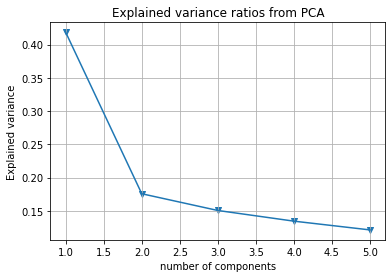

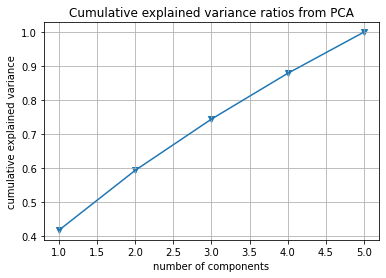

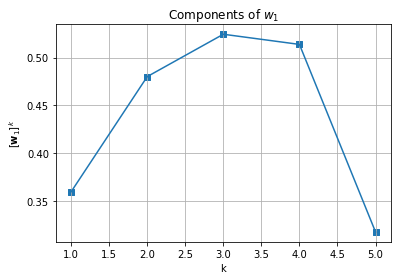

In [10]:
pca = PCA()
pca.fit(data_matrix)

print(f"First principal component: {pca.components_[0]}")
print(f"Explained variance ratios: {pca.explained_variance_ratio_}")

# explained variances
with plt.ioff():
    fig, ax = plt.subplots()
    
ax.plot(range(1, num_of_features+1), pca.explained_variance_ratio_)
ax.scatter(range(1, num_of_features+1), pca.explained_variance_ratio_, marker="v")
ax.grid()
ax.set_xlabel("number of components")
ax.set_ylabel("Explained variance")
ax.set_title("Explained variance ratios from PCA")

fig.savefig(os.path.join(run_path, "explained_variances.png"))

# Cumulative explained variance ratios
with plt.ioff():
    fig, ax = plt.subplots()
    
ax.plot(range(1, num_of_features+1), np.cumsum(pca.explained_variance_ratio_))
ax.scatter(range(1, num_of_features+1), np.cumsum(pca.explained_variance_ratio_), marker="v")
ax.grid()
ax.set_xlabel("number of components")
ax.set_ylabel("cumulative explained variance")
ax.set_title("Cumulative explained variance ratios from PCA")

fig.savefig(os.path.join(run_path, "cumulative_explained_variances.png"))

# weights of first principal component
with plt.ioff():
    c_fig, c_ax = plt.subplots()

w1 = pca.components_[0]
w1 = np.abs(w1)
    
c_ax.plot(range(1, num_of_features+1), w1)
c_ax.scatter(range(1, num_of_features+1), w1, marker="s")
c_ax.grid()
c_ax.set_xlabel("k")
c_ax.set_ylabel(r"$[\mathbf{w}_1]^k$")
c_ax.set_title(r"Components of $w_1$")

c_fig.savefig(os.path.join(run_path, "1st_pc_weights.png"))

plt.show()

plt.close(c_fig)

No. particles: 20.0, No. feature vectors: 156
No. particles: 25.0, No. feature vectors: 156
No. particles: 30.0, No. feature vectors: 156
No. particles: 35.0, No. feature vectors: 156
No. particles: 40.0, No. feature vectors: 156
No. particles: 45.0, No. feature vectors: 156
No. particles: 50.0, No. feature vectors: 156
No. particles: 55.0, No. feature vectors: 156
No. particles: 60.0, No. feature vectors: 156
No. particles: 65.0, No. feature vectors: 156
No. particles: 70.0, No. feature vectors: 156
No. particles: 75.0, No. feature vectors: 156
No. particles: 80.0, No. feature vectors: 156
No. particles: 85.0, No. feature vectors: 156
No. particles: 90.0, No. feature vectors: 156
No. particles: 95.0, No. feature vectors: 156
No. particles: 100.0, No. feature vectors: 156
No. particles: 105.0, No. feature vectors: 156
No. particles: 110.0, No. feature vectors: 156
No. particles: 115.0, No. feature vectors: 156
No. particles: 120.0, No. feature vectors: 156
No. particles: 125.0, No. fea

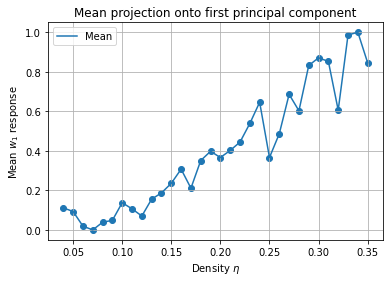

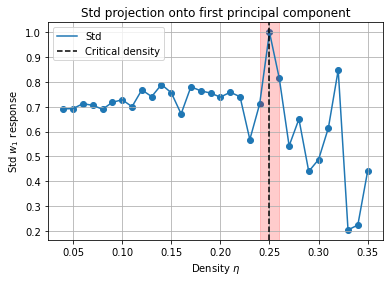

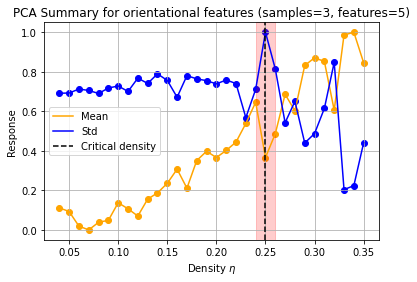

In [11]:
# Plot the response with respect to first component

w_1 = np.abs(pca.components_[0])

means = []
stds = []

#scores_pca = pca.transform(data_matrix)[:, 0].reshape(len(samples.keys()), len(fvs))

# compute scores for each packing fraction value
for i, particle_number in enumerate(sorted(samples.keys())):
    
    fvs = samples[particle_number]
    
    print(f"No. particles: {particle_number}, No. feature vectors: {len(fvs)}")
    
    #scores = scores_pca[i]
    scores = np.array([w_1 @ vec for vec in fvs])
    #print(scores)
    
    avg = np.mean(scores)
    std = np.std(scores)
    
    means.append(avg)
    stds.append(std)

# convert to numpy
means = np.array(means)
stds = np.array(stds)

print(means)
print(stds)

# Normalize the values
norm_means = (means - min(means)) / max(means - min(means))
norm_stds = stds / max(stds)

densities = [N*a*b/(R**2-r**2) for N in sorted(samples.keys())]

critical_density = densities[np.argmax(norm_stds)]
particle_diff = 5
spacing = particle_diff*a*b / (R**2 - r**2)

with plt.ioff():
    mean_fig, mean_ax = plt.subplots()
    std_fig, std_ax = plt.subplots()
    all_fig, all_ax = plt.subplots()
    
### Plotting ###

# Mean projections
mean_ax.set_xlabel(r"Density $\eta$")
mean_ax.set_ylabel(r"Mean $w_1$ response")
mean_ax.grid()
mean_ax.plot(densities, norm_means, label="Mean")
mean_ax.scatter(densities, norm_means)
mean_ax.set_title("Mean projection onto first principal component")
mean_ax.legend()

# Std deviation of projections
std_ax.set_xlabel(r"Density $\eta$")
std_ax.set_ylabel(r"Std $w_{1}$ response")
std_ax.grid()
std_ax.plot(densities, norm_stds, label="Std")
std_ax.scatter(densities, norm_stds)
std_ax.set_title("Std projection onto first principal component")
std_ax.axvline(x=critical_density, linestyle="--", color="black", label="Critical density")
std_ax.axvspan(xmin=critical_density-spacing, xmax=critical_density+spacing, color="red", alpha=0.2)
std_ax.legend()

# plotting them together
all_ax.set_xlabel(r"Density $\eta$")
all_ax.set_ylabel("Response")
all_ax.grid()
all_ax.plot(densities, norm_means, color="orange", label="Mean")
all_ax.scatter(densities, norm_means, color="orange")
all_ax.plot(densities, norm_stds, color="blue", label="Std")
all_ax.scatter(densities, norm_stds, color="blue")
all_ax.set_title(f"PCA Summary for orientational features (samples={num_of_samples}, features={num_of_features})")
all_ax.axvline(x=critical_density, linestyle="--", color="black", label="Critical density")
all_ax.axvspan(xmin=critical_density-spacing, xmax=critical_density+spacing, color="red", alpha=0.2)
all_ax.legend()
###

print("\n")
print(fr"Critical density detected at eta = {critical_density:.4f} by PCA")

mean_fig.savefig(os.path.join(run_path, "means.png"))
std_fig.savefig(os.path.join(run_path, "stds.png"))
all_fig.savefig(os.path.join(run_path,"all.png"))

plt.show()

plt.close(mean_fig)
plt.close(std_fig)
plt.close(all_fig)

# Write critical density to text file
phase_transition_file = os.path.join(results_path, "phase_transition_IN.txt")

with open(phase_transition_file, "w") as out_file:
    out_file.write(f"critical density: {critical_density}")

In [12]:
def background(f):
    def wrapped(*args, **kwargs):
        return asyncio.get_event_loop().run_in_executor(None, f, *args, **kwargs)
    
    return wrapped

In [13]:
# Visualize how the feature function chooses
# also plot the snapshots

if not os.path.exists(os.path.join(run_path, "method")):
    os.mkdir(os.path.join(run_path, "method"))

@background
def demonstrate_method(N):

    lc_system = systems[N]

    # maximally equilibrated step
    step_number = max(lc_system.snapshots.keys())

    # save folder
    save_folder = os.path.join(run_path, "method", f"N={N}")
    os.makedirs(save_folder, exist_ok=True)

    # input coordinates
    input_coords = lc_system.snapshots[step_number]

    # feature vectors and coordinates of feature particles
    _, ncs = create_feature_vectors_from_snapshot(input_coords, num_of_features, num_samples=3)

    # plot neighbors
    with plt.ioff():
        for i, probe in enumerate(list(ncs.keys())):
            particles_to_plot = [probe] + ncs[probe]
            fig = lc_system.plot_snapshot(step_number, extra_particles=particles_to_plot)

            fig.savefig(os.path.join(save_folder, f"N_{N}_figure_{i}.png"))
            plt.close(fig)

for N in systems.keys():
    demonstrate_method(N)

In [14]:
# plot all the snapshots

if not os.path.exists(os.path.join(results_path, "plots")):
    os.mkdir(os.path.join(results_path, "plots"))

@background
def plot_all_snapshots(N):
    
    lc_system = systems[N]
    
    save_folder = os.path.join(results_path, "plots", f"N={N}")
    os.makedirs(save_folder, exist_ok=True)

    # snapshots
    with plt.ioff():
        for step in lc_system.snapshots.keys():
            fig = lc_system.plot_snapshot(step, color_angles=True)
            fig.savefig(os.path.join(save_folder, f"N_{N}_step_{step}.png"))
            plt.close(fig)
    
for N in systems.keys():
    plot_all_snapshots(N)

In [15]:
# phase diagram

rs = [0, 2, 6, 10, 14]

densities = []
for rp in rs:
    txt_path = os.path.join(base_results_path, f"r={rp}", "phase_transition_IN.txt")
    with open(txt_path, "r") as in_file:
        density = float(in_file.readline().strip().split(" ")[-1])
        densities.append(density)

with plt.ioff():
    fig, ax = plt.subplots()
    
ax.plot(rs, densities, linestyle="dotted", label="Phase boundary")
ax.scatter(rs, densities, marker="v", label="PCA critical densities")
ax.set_xlabel(r"inner radius $r$")
ax.set_ylabel(r"packing fraction $\eta$")
ax.set_xlim(0, 22)
ax.set_ylim(0, 0.7)
ax.set_title("PCA identified phase boundary")
ax.legend()

plt.show(fig)
plt.close(fig)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Sam Yu\\Desktop\\School\\4A\\Phys_437A_Research_Project\\results\\2021-11-19\\r=2\\phase_transition_IN.txt'

In [ ]:
print(pca.n_features_)
print(pca.n_samples_)

C:\Users\Sam Yu\Documents\GitHub\LiquidCrystals\LiquidCrystalSystem.py:96: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = fig.colorbar(e, label="Angle wrt x-axis", orientation="horizontal", pad=0.05)
